## colab에서 폰트 적용을 위한 다운로드

In [ ]:
!pip install tqdm

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120893 files and direc

## 기본 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

## colab에서 plt에 폰트 적용

In [ ]:
plt.rc('font', family='NanumBarunGothic')

## colab drive mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## csv file 불러오기

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_cs.csv")

<ipython-input-16-7dbe61ce4c06>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_cs.csv")


## 데이터 기본 전처리

In [ ]:
created_datetime = pd.to_datetime(data['created'])
updated_datetime = pd.to_datetime(data['last_updated'])

In [ ]:
data["created_datetime"] = created_datetime.dt.date
data["created_datetime_month"] = data["created_datetime"].str[0:7]
data["last_updated_datetime"] = updated_datetime.dt.date
data.drop(columns=['created','last_updated'], inplace=True)
data.rename(columns={"Unnamed: 0":"ori_index"}, inplace=True)

## 2007년 4월 이후 데이터 추출

In [ ]:
data_time = pd.to_datetime(data["created_datetime"])
data = data[data_time.dt.year.apply(int) > 2006]
data_time = pd.to_datetime(data["created_datetime"])
data = data[data_time.dt.month.apply(int) > 3]

## 위의 가공데이터 저장

In [ ]:
data.to_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_cs1.csv", index = False)

## 위의 가공데이터 불러오기

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_cs1.csv")

# 카테고리 종류
AI(AI의 전반적인 논문)  
CL(자연어처리관련 논문)  
CV(컴퓨터 비전관련 논문)  
FL(Formal Languages and Automata Theory관련 논문)  
LG(ML 관련 논문)  
NE(Neural and Evolutionary Computing관련 논문)  

## 카테고리 분할 함수

In [ ]:
def csv_category_collector(data, categories_name='cs.AI', save=False):
    data = data[data['categories'].str.contains(categories_name)]
    # print(a.sum())
    # print(a.mean())
    # print(a.count())
    if save:
        data.to_csv(f"{categories_name}.csv")
    return data

In [ ]:
data_ai = csv_category_collector(data, categories_name="cs.AI",)
print(len(data_ai))
data_cl = csv_category_collector(data, categories_name="cs.CL",)
print(len(data_cl))
data_cv = csv_category_collector(data, categories_name="cs.CV",)
print(len(data_cv))
data_fl = csv_category_collector(data, categories_name="cs.FL",)
print(len(data_fl))
data_lg = csv_category_collector(data, categories_name="cs.LG",)
print(len(data_lg))
data_ne = csv_category_collector(data, categories_name="cs.NE",)
print(len(data_ne))

48090
37386
69873
3074
88623
8508


## 카테고리 통합, 저장

In [ ]:
datas_ai = pd.concat([data_ai, data_cl, data_cv, data_fl, data_lg, data_ne])
datas_ai = datas_ai.drop_duplicates(['ori_index'], keep = 'first')

In [ ]:
datas_ai.to_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_ai.csv", index = False)

NameError: ignored

## 년도를 기준으로 카테고리별 경향성 그래프 그리기

In [ ]:
def yearly_lineplot(data, title):
  plt.title(title)
  sns.lineplot(data=data.groupby("created_datetime_month").count()['ori_index'])
  plt.xticks(np.arange(0, 149, 9), ('07','08','09','10',
              '11','12','13','14','15','16','17','18','19','20',
              '21','22','23'))
  plt.xlabel("년도")
  plt.ylabel('발행 수')

In [ ]:
def yearly_lineplots(data, title):
  plt.title(title)
  sns.lineplot(data=data.groupby("created_datetime_month").count()['ori_index'])
  sorted_unique_value = data.sort_values('created_datetime_month')["created_datetime_month"].unique()
  sorted_unique_value_name =[sorted_unique_value[i*9][2:] for i in range(len(sorted_unique_value)//9+1)]
  print(np.arange(0, len(sorted_unique_value), 9))
  plt.xticks(np.arange(0, len(sorted_unique_value), 9),sorted_unique_value_name)
  plt.xlabel("년-월")
  plt.ylabel('발행 수')

[  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135 144]
[  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135 144]
[  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135 144]
[  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135]
[  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135 144]
[  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135 144]


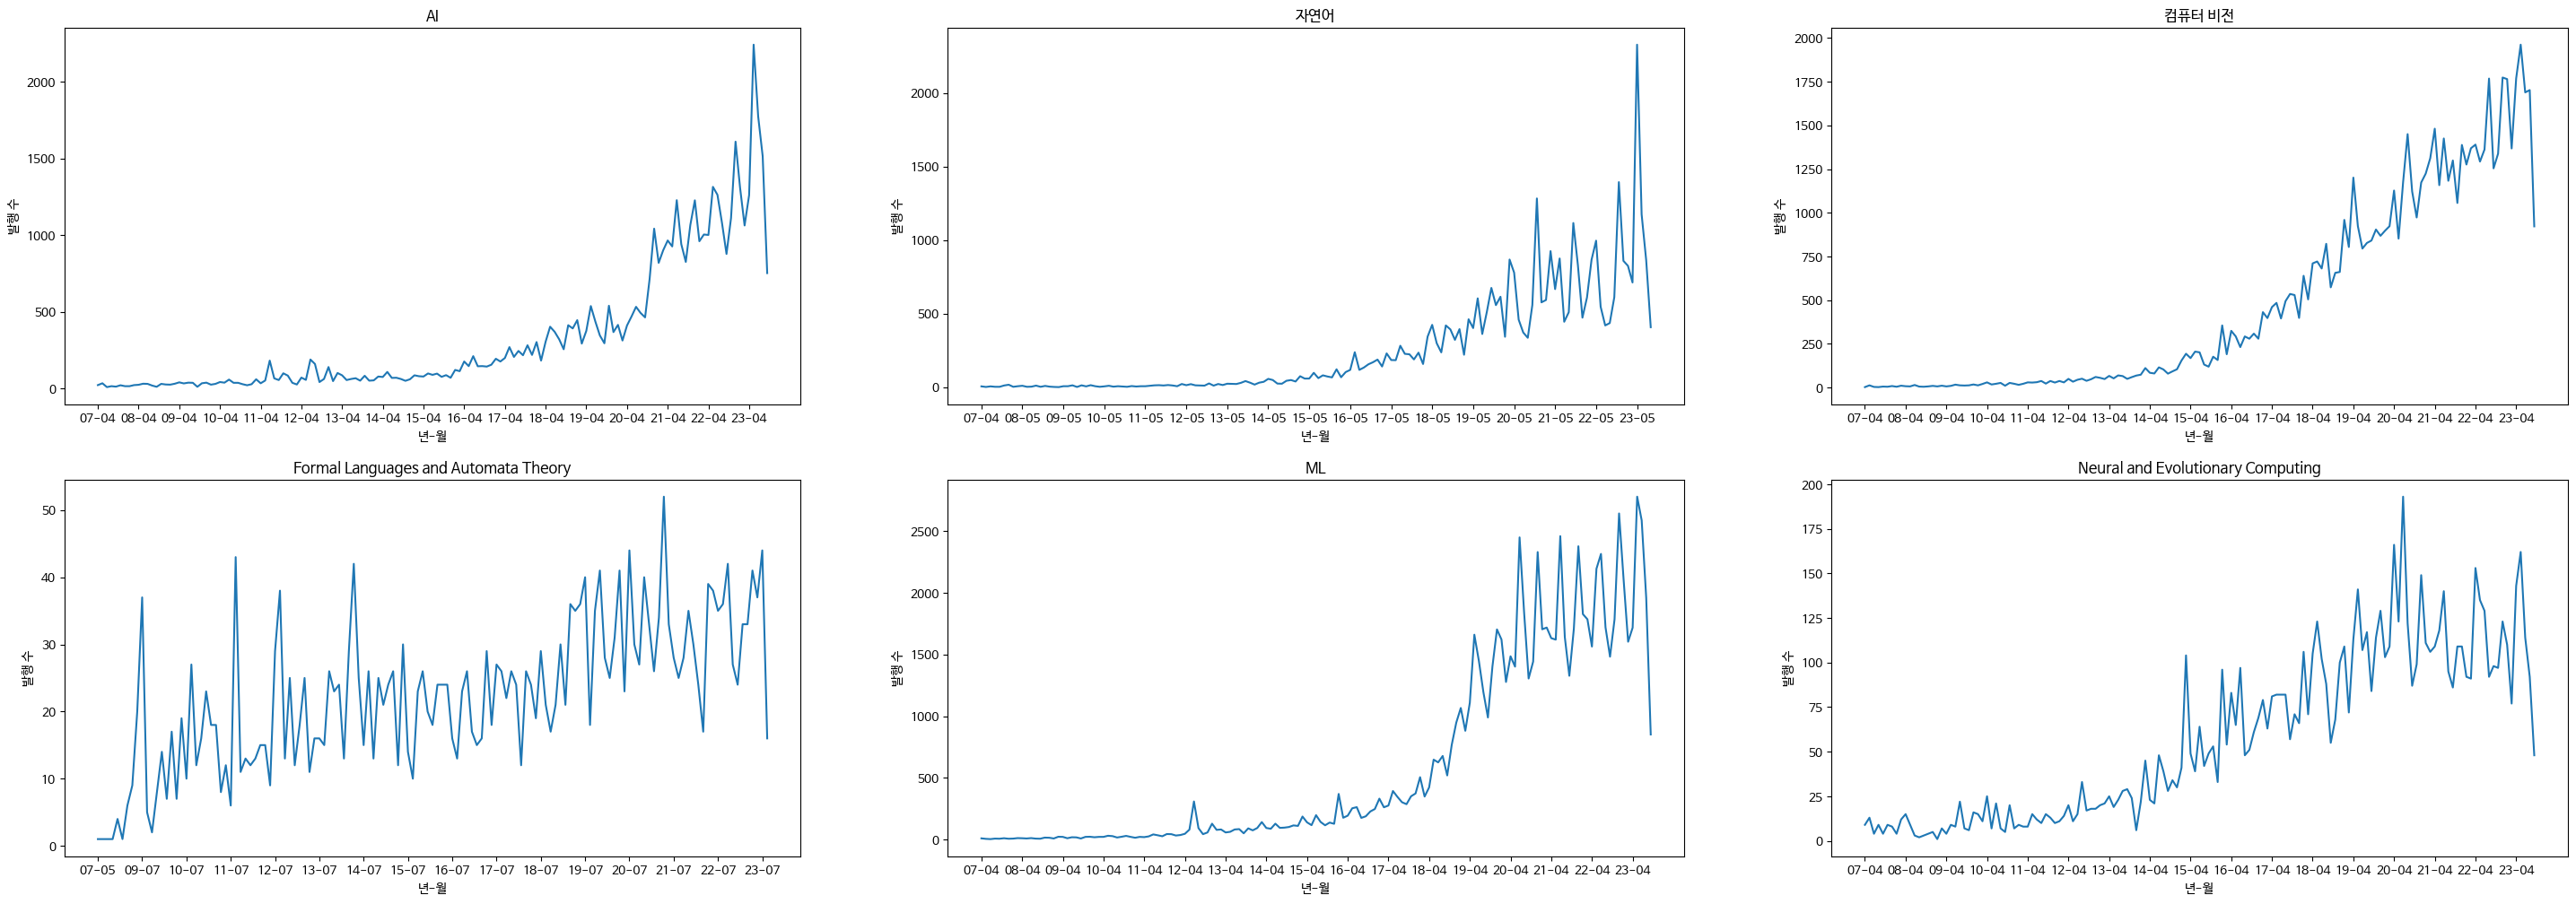

In [ ]:
plt.figure(figsize=(36,12))
plt.subplot(2,3,1) # AI
yearly_lineplots(data_ai, "AI")
plt.subplot(2,3,2) # 자연어
yearly_lineplots(data_cl, "자연어")
plt.subplot(2,3,3) # 컴퓨터 비전
yearly_lineplots(data_cv, "컴퓨터 비전")
plt.subplot(2,3,4) # Formal Languages and Automata Theory
yearly_lineplots(data_fl, "Formal Languages and Automata Theory")
plt.subplot(2,3,5) # ML
yearly_lineplots(data_lg, "ML")
plt.subplot(2,3,6) # Neural and Evolutionary Computing
yearly_lineplots(data_ne, "Neural and Evolutionary Computing")

# plt.savefig('/content/drive/MyDrive/EDA 3조(code)/data.png',
#             format='png', dpi=200)
plt.show()

## 통합 카테고리 데이터 가져오기

In [ ]:
data_ai = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_ai.csv")

## TF를 이용한 카테고리 재분류(not use)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
tokenized_title = [nltk.word_tokenize(i) for i in data["abstract"]]

In [ ]:
all_tokens =[]
for words in tokenized_title:
  for word in words:
    # 소문자 변환
    word = word.lower()
    # 개별 단어가 스톱워드에 포함되지 않으면 word_token에 추가
    if word not in stopwords:
        all_tokens.append(word)

In [ ]:
counter=Counter(all_tokens)
counter.most_common(100)

[]

In [ ]:
data_ai
data_cl
data_cv
data_fl
data_lg
data_ne

In [ ]:
keyword = "GAN"
a1 = data[data["title"].str.contains(f"\W{keyword}\W",case=False,regex=True) | data["abstract"].str.contains(f"\W{keyword}\W",case=False,regex=True)]
a=data[data["abstract"].str.contains(f"\W{keyword}\W",case=False,regex=True)]
a2=data[data["title"].str.contains(f"\W{keyword}\W",case=False,regex=True)]

In [ ]:
b=data[data["abstract"].str.contains("\WConvolution Neural Network\W",case=False,regex=True)]
# b=data[data["abstract"].str.contains("Recurrent Neural Network",case=False)]

In [ ]:
data["abstract"]

0           The intelligent acoustic emission locator is...
1           Part I describes an intelligent acoustic emi...
2           This paper discusses the benefits of describ...
3           Advances in semiconductor technology are con...
4           Ordinal regression is an important type of l...
                                ...                        
188383      Cooperative coevolutionary algorithms (CCEAs...
188384      Spiking neural networks (SNNs) are emerging ...
188385      In this paper, we consider the problem of a ...
188386      The generalized quadratic assignment problem...
188387      This article studies the expressive power of...
Name: abstract, Length: 188388, dtype: object

In [ ]:
# data["abstract"].str.extract("(inT)", expand=True)
ak =data["abstract"].str.extract("(intelli)", flags=re.IGNORECASE, expand=True)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2743 entries, 5123 to 188031
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ori_index               2743 non-null   int64  
 1   id                      2743 non-null   float64
 2   authors                 2743 non-null   object 
 3   title                   2743 non-null   object 
 4   categories              2743 non-null   object 
 5   submitter               2743 non-null   object 
 6   comments                1660 non-null   object 
 7   journal-ref             172 non-null    object 
 8   doi                     272 non-null    object 
 9   report-no               17 non-null     object 
 10  license                 2743 non-null   object 
 11  abstract                2743 non-null   object 
 12  created_datetime        2743 non-null   object 
 13  last_updated_datetime   2743 non-null   object 
 14  created_datetime_month  2743 non-nu

In [ ]:
len(a['ori_index'].unique())

2743

In [ ]:
len(a1['ori_index'].unique())

2853

In [ ]:
len(a2['ori_index'].unique())

631

In [ ]:
a.loc[67,'abstract']

'  The proposal is to use clusters, graphs and networks as models in order to\nanalyse the Web structure. Clusters, graphs and networks provide knowledge\nrepresentation and organization. Clusters were generated by co-site analysis.\nThe sample is a set of academic Web sites from the countries belonging to the\nEuropean Union. These clusters are here revisited from the point of view of\ngraph theory and social network analysis. This is a quantitative and structural\nanalysis. In fact, the Internet is a computer network that connects people and\norganizations. Thus we may consider it to be a social network. The set of Web\nacademic sites represents an empirical social network, and is viewed as a\nvirtual community. The network structural properties are here analysed applying\ntogether cluster analysis, graph theory and social network analysis.\n'

In [ ]:
a3 = pd.concat([a,a2])
a3 = a3.drop_duplicates(['ori_index'], keep = 'first')

In [ ]:
a3["created_datetime_month"].unique()

array(['2016-07', '2016-09', '2016-10', '2016-11', '2016-12', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-04',
       '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-11',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2019-10', '2019-12', '2015-06', '2015-12',
       '2016-05', '2015-11', '2015-09'], dtype=object)

In [ ]:
a3.sort_values('created_datetime_month')["created_datetime_month"].unique()[0][2:4]

'15'

[ 0  9 18 27 36 45 54 63]


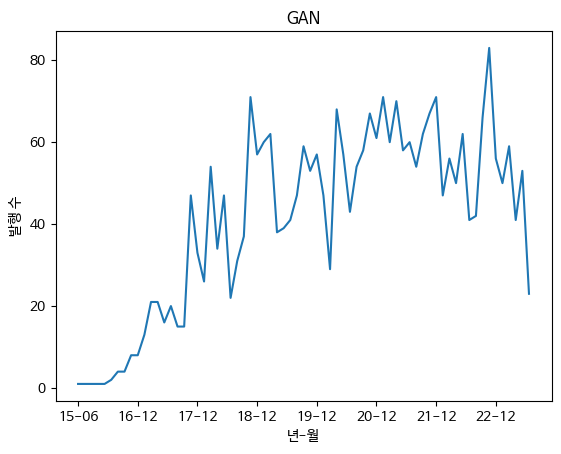

In [ ]:
yearly_lineplots(a3,"GAN")
plt.savefig('/content/drive/MyDrive/EDA 3조(code)/GAN.png',
            format='png', dpi=200)

## papers with code 원본 불러오기

In [ ]:
paperswithcode = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/paperswithcode_fin.csv")

NameError: ignored

In [ ]:
paperswithcode

In [ ]:
# keyword = "GAN"
# a1 = data[data["title"].str.contains(f"\W{keyword}\W",case=False,regex=True) | data["abstract"].str.contains(f"\W{keyword}\W",case=False,regex=True)]
# a=data[data["abstract"].str.contains(f"\W{keyword}\W",case=False,regex=True)]
# a2=data[data["title"].str.contains(f"\W{keyword}\W",case=False,regex=True)]

## 모델에서 특수문자 regex에서 except처리

In [ ]:
def pattern_change(data):
  # print(data.group())
  if data.group() == ")":
    return "\)"
  elif data.group() == "(":
    return "\("
  elif data.group() == "+":
    return "\+"

In [ ]:
for i in tqdm(paperswithcode.index):
  keyword = paperswithcode.iloc[i,2]
  if type(keyword) != type(1.0):
    keyword = re.sub("\(|\)|\+", pattern_change, keyword)
    paperswithcode.iloc[i,2] = keyword

100%|██████████| 1928/1928 [00:00<00:00, 10885.09it/s]


## 모델에 해당하는 논문 index 추출

In [ ]:
def categorize(data, keyword):
  return data[data["title"].str.contains(f"\W\d*\s*{keyword}s?\s\d\W",case=False,regex=True) | data["abstract"].str.contains(f"\W\d*\s*{keyword}s?\s*\d*\W",case=False,regex=True)]

In [ ]:
# 2시간...
list_all = []
for i in tqdm(paperswithcode.index):
  keyword = paperswithcode.iloc[i,2]
  ddd = categorize(data_ai, keyword)
  if len(ddd.index) > 0:
    list_all.append(
        str(set(ddd.index)).replace("{","").replace("}","")
    )
  else:
    list_all.append(None)

100%|██████████| 1928/1928 [4:11:55<00:00,  7.84s/it]


## 추출한 index paperswithcode.csv에 병합, 저장

In [ ]:
paperswithcode['indexs'] = list_all
paperswithcode

,method_name,categories_name,model_name,indexs
0,Computer Vision,Image Models,ResNet,"32768, 106502, 81929, 106505, 155660, 172046, ..."
1,Computer Vision,Image Models,Vision Transformer,"135170, 34820, 118792, 112653, 135184, 24594, ..."
2,Computer Vision,Image Models,VGG,"90113, 88070, 106505, 38922, 104461, 120846, 8..."
3,Computer Vision,Image Models,DenseNet,"94210, 96259, 86021, 92178, 143379, 98326, 983..."
4,Computer Vision,Image Models,VGG-16,"90113, 111619, 110086, 86537, 38922, 89611, 99..."
...,...,...,...,...
1923,Graphs,Graph Representation Learning,L-GCN,60984
1924,Graphs,Graph Representation Learning,GFSA,159177
1925,Graphs,Graph Representation Learning,DyGED,170365
1926,Graphs,Graph Representation Learning,DeepDrug,None


In [ ]:
paperswithcode.to_csv("/content/drive/MyDrive/EDA 3조(code)/paperswithcode_indexs_fin2.csv", index = False)

## paperswithcode.csv 저장파일 불러오기

In [ ]:
# paperswithcode = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/paperswithcode_indexs_fin.csv")
paperswithcode = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/치웅님 서치/paperswithcode_indexs_fin2.csv")

## paperswithcode.csv를 중분류에 해당하는 dictionary 분류

In [ ]:
def small_cate_to_middle_cate(data):
  category_name = None
  category_list = []
  total_dict = {}
  index_num = None
  for index, i in enumerate(data.iloc[:,3]):
    if data.iloc[index,1] != category_name:
      if len(category_list) > 0:
        print(category_name)
        print(category_list)
        total_dict[category_name] = category_list
      category_name = data.iloc[index,1]
      category_list = []
      index_num = index
    list_data=None
    if type(i) != type(1.0) and i:
      list_data = i.split(", ")
      category_list +=list_data
  print(category_name)
  print(category_list)
  total_dict[category_name] = category_list
  return total_dict

In [ ]:
middle_dict = small_cate_to_middle_cate(paperswithcode)

## paperswithcode.csv에서 중분류에 해당하는 dictionary를 대분류의 dictionary로 분류

In [ ]:
def middel_dict_to_big_dict(data, middle_dict):
  category_name = None
  category_list = []
  total_dict = {}
  data = data.drop_duplicates(['categories_name'], keep = 'first')
  for index, i in enumerate(data.index):
    try:
      if data.iloc[index,0] != category_name:
        if len(category_list) > 0:
          total_dict[category_name] = category_list
        category_name = data.iloc[index,0]
        category_list = []
      # list_data=None
      # print(i)
      # if i:
      # print(middle_dict[data.iloc[index,1]])
      category_list +=middle_dict[data.iloc[index,1]]
    except:
      pass
  total_dict[category_name] = category_list
  return total_dict

In [ ]:
cate_dic = middel_dict_to_big_dict(paperswithcode, middle_dict)


In [ ]:
# for i in cate_dic.keys():
#   cate_dic[i] = list(set(cate_dic[i]))

In [ ]:
# for i in cate_dic.keys():
#   print(i)

In [ ]:
# for i in cate_dic.keys():
#   print(len(cate_dic[i]))

## data_ai를 paperswithcode의 분류법으로 분류 및 저장

In [ ]:
data_ai["is_CV"] = np.nan
data_ai["is_NLP"] = np.nan
data_ai["is_RL"] = np.nan
data_ai["is_Au"] = np.nan
data_ai["is_Se"] = np.nan
data_ai["is_Gr"] = np.nan

In [ ]:
for index, i in enumerate(cate_dic.keys()):
  for j in cate_dic[i]:
    if index == 0:
      # if type(data_ai.loc[j,"is_cv"]) == type(1.0):
      data_ai.loc[int(j),"is_CV"] = True
    elif index == 1:
      data_ai.loc[int(j),"is_NLP"] = True
    elif index == 2:
      data_ai.loc[int(j),"is_RL"] = True
    elif index == 3:
      data_ai.loc[int(j),"is_Au"] = True
    elif index == 4:
      data_ai.loc[int(j),"is_Se"] = True
    elif index == 5:
      data_ai.loc[int(j),"is_Gr"] = True

In [ ]:
# type(data_ai.loc[0,"doi"])

In [ ]:
# data_ai["is_CV"]

In [ ]:
# data_ai[data_ai["is_Au"] == True]
# data_ai[~data_ai["is_CV"].isna()]

In [ ]:
data_ai.to_csv("/content/drive/MyDrive/EDA 3조(code)/data_ai_fin2.csv", index = False)

## dd

In [3]:
data_ai = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/치웅님 서치/data_ai_fin2.csv")

In [ ]:
data_ai[(~data_ai["is_CV"].isna() & ~data_ai["is_NLP"].isna()) | (~data_ai["is_CV"].isna() & ~data_ai["is_RL"].isna()) |
            (~data_ai["is_CV"].isna() & ~data_ai["is_Au"].isna()) | (~data_ai["is_CV"].isna() & ~data_ai["is_Se"].isna()) |
            (~data_ai["is_CV"].isna() & ~data_ai["is_Gr"].isna()) |
            (~data_ai["is_NLP"].isna() & ~data_ai["is_CV"].isna()) | (~data_ai["is_NLP"].isna() & ~data_ai["is_RL"].isna()) |
            (~data_ai["is_NLP"].isna() & ~data_ai["is_Au"].isna()) | (~data_ai["is_NLP"].isna() & ~data_ai["is_Se"].isna()) |
            (~data_ai["is_NLP"].isna() & ~data_ai["is_Gr"].isna()) |
            (~data_ai["is_RL"].isna() & ~data_ai["is_CV"].isna()) | (~data_ai["is_RL"].isna() & ~data_ai["is_NLP"].isna()) |
            (~data_ai["is_RL"].isna() & ~data_ai["is_Au"].isna()) | (~data_ai["is_RL"].isna() & ~data_ai["is_Se"].isna()) |
            (~data_ai["is_RL"].isna() & ~data_ai["is_Gr"].isna()) |
            (~data_ai["is_Au"].isna() & ~data_ai["is_CV"].isna()) | (~data_ai["is_Au"].isna() & ~data_ai["is_RL"].isna()) |
            (~data_ai["is_Au"].isna() & ~data_ai["is_NLP"].isna()) | (~data_ai["is_Au"].isna() & ~data_ai["is_Se"].isna()) |
            (~data_ai["is_Au"].isna() & ~data_ai["is_Gr"].isna()) |
            (~data_ai["is_Se"].isna() & ~data_ai["is_CV"].isna()) | (~data_ai["is_Se"].isna() & ~data_ai["is_RL"].isna()) |
            (~data_ai["is_Se"].isna() & ~data_ai["is_Au"].isna()) | (~data_ai["is_Se"].isna() & ~data_ai["is_NLP"].isna()) |
            (~data_ai["is_Se"].isna() & ~data_ai["is_Gr"].isna()) |
            (~data_ai["is_Gr"].isna() & ~data_ai["is_CV"].isna()) | (~data_ai["is_Gr"].isna() & ~data_ai["is_RL"].isna()) |
            (~data_ai["is_Gr"].isna() & ~data_ai["is_Au"].isna()) | (~data_ai["is_Gr"].isna() & ~data_ai["is_Se"].isna()) |
            (~data_ai["is_Gr"].isna() & ~data_ai["is_NLP"].isna())
            ]

,ori_index,id,authors,title,categories,submitter,comments,journal-ref,doi,report-no,...,abstract,created_datetime,last_updated_datetime,created_datetime_month,is_CV,is_NLP,is_RL,is_Au,is_Se,is_Gr
41,6307,705.23050,"Sizwe M. Dhlamini, Tshilidzi Marwala, and Thok...",Fuzzy and Multilayer Perceptron for Evaluation...,cs.AI cs.NE,Tshilidzi Marwala,7 pages,NaN,NaN,NaN,...,The work proposes the application of fuzzy s...,2007-05-16,2007-05-16,2007-05,NaN,True,True,NaN,NaN,NaN
43,6312,705.23100,"C.B. Vilakazi, T. Marwala, P. Mautla and E. Mo...",On-Line Condition Monitoring using Computation...,cs.AI,Tshilidzi Marwala,8 pages,NaN,NaN,NaN,...,This paper presents bushing condition monito...,2007-05-16,2007-05-16,2007-05,NaN,True,True,NaN,NaN,True
69,16200,707.30300,"Gregoire Danoy, Pascal Bouvry, Matthias R. Bru...",Optimal Design of Ad Hoc Injection Networks by...,cs.NE cs.AI cs.NI,Matthias Brust R.,"1 page, 1 figure",Genetic and Evolutionary Computation Conferenc...,NaN,NaN,...,This work aims at optimizing injection netwo...,2007-07-20,2007-07-20,2007-07,NaN,True,True,NaN,NaN,NaN
98,24771,709.25060,"Vukosi N. Marivate, Fulufhelo V. Nelwamodo, Ts...","Autoencoder, Principal Component Analysis and ...",cs.AI cs.DB,Tshilidzi Marwala,9 pages,NaN,NaN,NaN,...,Data collection often results in records tha...,2007-09-16,2007-09-16,2007-09,True,True,NaN,NaN,NaN,NaN
156,56345,804.00660,"Kevin Henshall, Peter Schachte, Harald S{\o}nd...",Binary Decision Diagrams for Affine Approximation,cs.LO cs.AI,Peter Schachte,15 pages,NaN,NaN,NaN,...,Selman and Kautz's work on ``knowledge compi...,2008-04-01,2008-04-01,2008-04,True,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188351,1877083,2307.06088,"Shalini Shrivastava, Vivek Saraswat, Gayatri D...",Non-Ideal Program-Time Conservation in Charge ...,cs.NE cs.ET,Shalini Shrivastava,NaN,NaN,NaN,NaN,...,Training deep neural networks (DNNs) is comp...,2023-07-12,2023-07-12,2023-07,True,True,NaN,NaN,NaN,NaN
188357,1878806,2307.07811,Kamer Ali Yuksel,Generative Meta-Learning Robust Quality-Divers...,cs.NE q-fin.PM,Kamer Ali Yuksel,NaN,NaN,NaN,NaN,...,This paper proposes a novel meta-learning ap...,2023-07-15,2023-07-15,2023-07,NaN,True,NaN,NaN,True,NaN
188358,1879111,2307.08116,"Junren Chen, Siyao Yang, Huaqiang Wu, Giacomo ...",Scaling Limits of Memristor-Based Routers for ...,cs.ET cs.NE,Junren Chen,"4 pages, 9 figures",NaN,NaN,NaN,...,Multi-core neuromorphic systems typically us...,2023-07-16,2023-07-16,2023-07,NaN,True,NaN,NaN,NaN,True
188372,1889161,2308.01269,Mahmood Yashar and Tarik A. Rashid,VAPI: Vectorization of Algorithm for Performan...,cs.NE,Tarik A. Rashid,21 pages,NaN,NaN,NaN,...,This study presents the vectorization of met...,2023-07-19,2023-07-19,2023-07,True,True,NaN,NaN,NaN,NaN


In [ ]:
# data_ai[~data_ai["is_CV"].isna() & ~data_ai["is_NLP"].isna()]
data_ai[data_ai['categories'].str.contains("cs.CV") & ~data_ai["is_CV"].isna() & ~data_ai["is_NLP"].isna()]

,ori_index,id,authors,title,categories,submitter,comments,journal-ref,doi,report-no,...,abstract,created_datetime,last_updated_datetime,created_datetime_month,is_CV,is_NLP,is_RL,is_Au,is_Se,is_Gr
933,229452,1012.00840,"Harshith C, Karthik R. Shastry, Manoj Ravindra...",Survey on Various Gesture Recognition Techniqu...,cs.AI cs.CV cs.HC cs.RO,Karthik Shastry R,12 PAGES,NaN,10.5121/ijcses.2010.1203,NaN,...,Gesture recognition is mainly apprehensive o...,2010-12-01,2010-12-01,2010-12,True,True,NaN,NaN,NaN,NaN
1471,291520,1110.02140,Ridwan Al Iqbal,Eclectic Extraction of Propositional Rules fro...,cs.LG cs.AI cs.CV cs.NE,Ridwan Al Iqbal,"ICCIT 2011, Dhaka, Bangladesh",NaN,NaN,NaN,...,Artificial Neural Network is among the most ...,2011-10-02,2011-10-02,2011-10,True,True,NaN,NaN,NaN,NaN
1619,332946,1204.06840,Matthias Scholz,Validation of nonlinear PCA,cs.LG cs.AI cs.CV stat.ML,Matthias Scholz,"12 pages, 5 figures","Neural Processing Letters, 2012",10.1007/s11063-012-9220-6,NaN,...,Linear principal component analysis (PCA) ca...,2012-04-03,2012-04-03,2012-04,True,True,NaN,NaN,NaN,NaN
3034,487952,1312.65990,Shatrughan Modi and Dr. Seema Bawa,Image Processing based Systems and Techniques ...,cs.CV cs.AI,Shatrughan Modi,"5 pages, 1 table, Published with International...",International Journal of Computer Applications...,10.5120/7221-0041,NaN,...,Coins are frequently used in everyday life a...,2013-12-23,2013-12-23,2013-12,True,True,NaN,NaN,NaN,NaN
3822,623812,1505.03540,"Mohammad Havaei, Axel Davy, David Warde-Farley...",Brain Tumor Segmentation with Deep Neural Netw...,cs.CV cs.AI,Mohammad Havaei,NaN,NaN,10.1016/j.media.2016.05.004,NaN,...,"In this paper, we present a fully automatic ...",2015-05-13,2016-05-20,2015-05,True,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136155,1896195,2308.08303,"Sanket Thakur, Cigdem Beyan, Pietro Morerio, V...",Leveraging Next-Active Objects for Context-Awa...,cs.CV,Sanket Thakur,Accepted in WACV'24,NaN,NaN,NaN,...,Objects are crucial for understanding human-...,2023-08-16,2023-08-16,2023-08,True,True,NaN,NaN,NaN,True
136156,1896208,2308.08316,"Binhui Liu, Xin Liu, Anbo Dai, Zhiyong Zeng, Z...",Dual-Stream Diffusion Net for Text-to-Video Ge...,cs.CV,Binhui Liu,"8pages, 7 figures",NaN,NaN,NaN,...,"With the emerging diffusion models, recently...",2023-08-16,2023-08-16,2023-08,True,True,NaN,NaN,NaN,NaN
136161,1896251,2308.08359,"Yufei Guo, Yuhan Zhang, Yuanpei Chen, Weihang ...",Membrane Potential Batch Normalization for Spi...,cs.CV,Yufei Guo,Accepted by ICCV2023,NaN,NaN,NaN,...,As one of the energy-efficient alternatives ...,2023-08-16,2023-08-16,2023-08,True,True,NaN,NaN,NaN,NaN
136162,1896253,2308.08361,"Chao Li, Anbang Yao",KernelWarehouse: Towards Parameter-Efficient D...,cs.CV cs.LG,Anbang Yao,This research work was completed and submitted...,NaN,NaN,NaN,...,Dynamic convolution learns a linear mixture ...,2023-08-16,2023-08-16,2023-08,True,True,NaN,NaN,NaN,NaN


In [ ]:
data_ai[~data_ai["is_CV"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37016 entries, 10 to 188382
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ori_index               37016 non-null  int64  
 1   id                      37016 non-null  float64
 2   authors                 37016 non-null  object 
 3   title                   37016 non-null  object 
 4   categories              37016 non-null  object 
 5   submitter               37016 non-null  object 
 6   comments                22900 non-null  object 
 7   journal-ref             2935 non-null   object 
 8   doi                     4304 non-null   object 
 9   report-no               248 non-null    object 
 10  license                 36997 non-null  object 
 11  abstract                37016 non-null  object 
 12  created_datetime        37016 non-null  object 
 13  last_updated_datetime   37016 non-null  object 
 14  created_datetime_month  37016 non-nu

In [ ]:
data_ai[~data_ai["is_NLP"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67224 entries, 3 to 188383
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ori_index               67224 non-null  int64  
 1   id                      67224 non-null  float64
 2   authors                 67224 non-null  object 
 3   title                   67224 non-null  object 
 4   categories              67224 non-null  object 
 5   submitter               67223 non-null  object 
 6   comments                41906 non-null  object 
 7   journal-ref             6214 non-null   object 
 8   doi                     8266 non-null   object 
 9   report-no               614 non-null    object 
 10  license                 67149 non-null  object 
 11  abstract                67224 non-null  object 
 12  created_datetime        67224 non-null  object 
 13  last_updated_datetime   67224 non-null  object 
 14  created_datetime_month  67224 non-nul

In [ ]:
data_ai[~data_ai["is_RL"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 41 to 188386
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ori_index               4603 non-null   int64  
 1   id                      4603 non-null   float64
 2   authors                 4603 non-null   object 
 3   title                   4603 non-null   object 
 4   categories              4603 non-null   object 
 5   submitter               4603 non-null   object 
 6   comments                2810 non-null   object 
 7   journal-ref             470 non-null    object 
 8   doi                     605 non-null    object 
 9   report-no               44 non-null     object 
 10  license                 4589 non-null   object 
 11  abstract                4603 non-null   object 
 12  created_datetime        4603 non-null   object 
 13  last_updated_datetime   4603 non-null   object 
 14  created_datetime_month  4603 non-null

In [ ]:
data_ai[~data_ai["is_Au"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 3452 to 185993
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ori_index               257 non-null    int64  
 1   id                      257 non-null    float64
 2   authors                 257 non-null    object 
 3   title                   257 non-null    object 
 4   categories              257 non-null    object 
 5   submitter               257 non-null    object 
 6   comments                175 non-null    object 
 7   journal-ref             18 non-null     object 
 8   doi                     25 non-null     object 
 9   report-no               1 non-null      object 
 10  license                 257 non-null    object 
 11  abstract                257 non-null    object 
 12  created_datetime        257 non-null    object 
 13  last_updated_datetime   257 non-null    object 
 14  created_datetime_month  257 non-null

In [ ]:
data_ai[~data_ai["is_Se"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 459 to 188368
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ori_index               4908 non-null   int64  
 1   id                      4908 non-null   float64
 2   authors                 4908 non-null   object 
 3   title                   4908 non-null   object 
 4   categories              4908 non-null   object 
 5   submitter               4908 non-null   object 
 6   comments                3098 non-null   object 
 7   journal-ref             413 non-null    object 
 8   doi                     559 non-null    object 
 9   report-no               37 non-null     object 
 10  license                 4908 non-null   object 
 11  abstract                4908 non-null   object 
 12  created_datetime        4908 non-null   object 
 13  last_updated_datetime   4908 non-null   object 
 14  created_datetime_month  4908 non-nul

In [ ]:
data_ai[~data_ai["is_Gr"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15711 entries, 20 to 188377
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ori_index               15711 non-null  int64  
 1   id                      15711 non-null  float64
 2   authors                 15711 non-null  object 
 3   title                   15711 non-null  object 
 4   categories              15711 non-null  object 
 5   submitter               15711 non-null  object 
 6   comments                10086 non-null  object 
 7   journal-ref             1225 non-null   object 
 8   doi                     1816 non-null   object 
 9   report-no               92 non-null     object 
 10  license                 15699 non-null  object 
 11  abstract                15711 non-null  object 
 12  created_datetime        15711 non-null  object 
 13  last_updated_datetime   15711 non-null  object 
 14  created_datetime_month  15711 non-nu

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_cs.csv")

<ipython-input-3-9afb23db2489>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_cs.csv")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438727 entries, 0 to 438726
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    438727 non-null  int64 
 1   id            438727 non-null  object
 2   authors       438727 non-null  object
 3   title         438727 non-null  object
 4   categories    438727 non-null  object
 5   created       438727 non-null  object
 6   last_updated  438727 non-null  object
 7   submitter     438599 non-null  object
 8   comments      268362 non-null  object
 9   journal-ref   56649 non-null   object
 10  doi           73663 non-null   object
 11  report-no     7582 non-null    object
 12  license       429524 non-null  object
 13  abstract      438727 non-null  object
dtypes: int64(1), object(13)
memory usage: 46.9+ MB


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/EDA 3조(code)/arxiv_cs1.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327516 entries, 0 to 327515
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ori_index              327516 non-null  int64  
 1   id                     327516 non-null  float64
 2   authors                327516 non-null  object 
 3   title                  327516 non-null  object 
 4   categories             327516 non-null  object 
 5   submitter              327515 non-null  object 
 6   comments               200390 non-null  object 
 7   journal-ref            40760 non-null   object 
 8   doi                    54529 non-null   object 
 9   report-no              4512 non-null    object 
 10  license                325653 non-null  object 
 11  abstract               327516 non-null  object 
 12  created_datetime       327516 non-null  object 
 13  last_updated_datetime  327516 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [43]:
data_ai[(data_ai['is_Se'] == True) & (data_ai['created_datetime_month'] == "2011-12")]

,ori_index,id,authors,title,categories,submitter,comments,journal-ref,doi,report-no,...,abstract,created_datetime,last_updated_datetime,created_datetime_month,is_CV,is_NLP,is_RL,is_Au,is_Se,is_Gr
1612,311060,1112.5505,"Nikzad Babaii Rizvandi, Javid Taheri, Albert Y...",A Study on Using Uncertain Time Series Matchin...,cs.DC cs.AI cs.LG cs.PF,Nikzad Babaii-Rizvandi,12 pages a version has been accepted to journa...,NaN,NaN,TR672- University of Sydney,...,"In this paper, we study CPU utilization time...",2011-12-23,2013-01-18,2011-12,NaN,NaN,NaN,NaN,True,NaN


In [23]:
data_ai[data_ai['created_datetime_month'] == "2011-12"]

,ori_index,id,authors,title,categories,submitter,comments,journal-ref,doi,report-no,...,abstract,created_datetime,last_updated_datetime,created_datetime_month,is_CV,is_NLP,is_RL,is_Au,is_Se,is_Gr
1591,306063,1112.0508,"Weiwei Cheng, Eyke H\""ullermeier",Label Ranking with Abstention: Predicting Part...,cs.AI,Weiwei Cheng,"4 pages, 1 figure, appeared at NIPS 2011 Choic...",NaN,NaN,NaN,...,We consider an extension of the setting of l...,2011-12-02,2011-12-02,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
1592,306346,1112.0791,"Wolfgang Faber, Miros{\l}aw Truszczy\'nski, St...",Strong Equivalence of Qualitative Optimization...,cs.LO cs.AI,Wolfgang Faber,NaN,NaN,NaN,NaN,...,We introduce the framework of qualitative op...,2011-12-04,2011-12-04,2011-12,NaN,True,NaN,NaN,NaN,NaN
1593,306477,1112.0922,"Johannes Oetsch, J\""org P\""uhrer, Hans Tompits",Extending Object-Oriented Languages by Declara...,cs.PL cs.AI,"J\""org P\""uhrer",Submitted to the 34th International Conference...,NaN,NaN,NaN,...,Many applications require complexly structur...,2011-12-05,2011-12-06,2011-12,NaN,True,NaN,NaN,NaN,NaN
1594,307044,1112.1489,Wan-Li Chen,Multi-granular Perspectives on Covering,cs.AI,Wan-Li Chen,12 pages,NaN,NaN,NaN,...,Covering model provides a general framework ...,2011-12-07,2011-12-07,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
1595,307225,1112.1670,"Casey Bennett, Thomas Doub, April Bragg, Jason...",Data Mining Session-Based Patient Reported Out...,cs.AI cs.GL,Casey Bennett,Keywords- Data Mining; Patient-Reported Outcom...,First IEEE International Conference on Healthc...,10.1109/HISB.2011.20,NaN,...,The CDOI outcome measure - a patient-reporte...,2011-12-07,2011-12-07,2011-12,NaN,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185761,310009,1112.4454,"Ofer M. Shir, Jonathan Roslund, Darrell Whitle...",Evolutionary Hessian Learning: Forced Optimal ...,cs.NE cs.NA quant-ph,Ofer Shir,NaN,NaN,NaN,NaN,...,The Covariance Matrix Adaptation Evolution S...,2011-12-19,2011-12-19,2011-12,NaN,True,NaN,NaN,NaN,NaN
185762,310461,1112.4906,"Larry Yaeger, Virgil Griffith, Olaf Sporns",Passive and Driven Trends in the Evolution of ...,cs.NE q-bio.PE,Virgil Griffith,"8 pages; In Bullock, S. et al. eds. Artificial...",NaN,NaN,NaN,...,The nature and source of evolutionary trends...,2011-12-21,2011-12-21,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
185763,310671,1112.5116,Nicolas Chaumont and Christoph Adami,Evolution of sustained foraging in 3D environm...,cs.NE q-bio.NC q-bio.PE,Christoph Adami,"18 pages, 15 figures. Supplementary Materials ...",NaN,NaN,NaN,...,Artificially evolving foraging behavior in s...,2011-12-21,2011-12-21,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
185764,310979,1112.5424,"Ofer M. Shir, Jonathan Roslund, Zaki Leghtas a...",Quantum Control Experiments as a Testbed for E...,cs.NE math-ph math.MP quant-ph,Ofer Shir,NaN,NaN,NaN,NaN,...,Experimental multi-objective Quantum Control...,2011-12-22,2011-12-22,2011-12,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data_ai['is_Se'] == True & data_ai['created_datetime_month'] == "2011-12"

TypeError: ignored

In [31]:
(data_ai['created_datetime_month'] == "2011-12") & (data_ai['created_datetime_month'] == "2011-12")

0         False
1         False
2         False
3         False
4         False
          ...  
188383    False
188384    False
188385    False
188386    False
188387    False
Name: created_datetime_month, Length: 188388, dtype: bool